# Data Reading and Cleaning

In [10]:
import pandas as pd

df = pd.read_csv('f:\df.csv', encoding= 'unicode_escape')

df.head()


D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (0,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0.1.1,text,created_at,lang,location,user_id,event,usa,usar,nevent,cleantext,MNB,DENSE,USE,BERT
0,0,RT @EbonyT_PhD:Shout out to the nurses who???...,Wed Dec 29 18:01:40 +0000 2021,en,NaN,7.18E+17,omicron,NaN,FALSE,2.0,nurse who?ve told can?t drink water nurse st...,0.0,0.0,0.0,not_target
1,1,RT @GOPKeegan: True! #Democrats #COVID19 #Trut...,Wed Dec 29 18:01:40 +0000 2021,en,NaN,1.45E+18,omicron,NaN,FALSE,2.0,true democrat covid19 truth covid,0.0,0.0,0.0,not_target
2,2,"RT @nilikm:In other words, daily #COVID19 rep...",Wed Dec 29 18:01:40 +0000 2021,en,"Mississauga, Ontario",1.28E+18,omicron,NaN,FALSE,2.0,word daily covid19 repos gross underestimate t...,0.0,0.0,0.0,not_target
3,3,It???s Wednesday. \r\n\r\nSchool starts on Mo...,Wed Dec 29 18:01:41 +0000 2021,en,at least 2m away from you,26824287,omicron,NaN,FALSE,2.0,it?s wednesday school stas monday one 430pm f...,0.0,0.0,0.0,not_target
4,4,RT @VikiLovesFACS:How can we know that #COVID1...,Wed Dec 29 18:01:42 +0000 2021,en,"Chicago, IL",1.33E+18,omicron,il,TRUE,2.0,know covid19 vaccine harm feility could effect...,0.0,0.0,0.0,not_target


# Data Cleaning

In [ ]:
import re, string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # miniscule
    text = text.lower()
    
    #remove emoji
    text = text.encode("ascii", "ignore").decode()
    
    # removing usernames
    text = re.sub('@[^\s]+', '', text)

    # removing links
    text = re.sub('((https?://[^\s]+)|(www\.[^\s]+))','',text)
    
        # removing rt
    text = re.sub('rt','',text)
    
    # removing punctuation
    text = text.translate(str.maketrans('','',string.punctuation))
    
    # tokenization
    tokens = word_tokenize(text)
   
    # suppression of stop words and lemmatization
    wordLemm = WordNetLemmatizer()
    final_words = []
    for token in tokens:
      # suppression of stop words
      if token not in stop_words and len(token) > 1:
        lemm = wordLemm.lemmatize(token)
        final_words.append(lemm)
    return ' '.join(final_words)

In [ ]:
df['cleantext'] = df.text.apply(cleantext)

# Rule_based Sentiment

In [146]:
import pandas as pd
df=pd.read_csv('df_sent.csv', encoding='utf8')
df.head()

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (1,6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1.1,text,created_at,lang,location,user_id,event,usa,usar,nevent,cleantext,MNB,DENSE,USE,BERT,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
0,0,0,RT @EbonyT_PhD:Shout out to the nurses who???...,Wed Dec 29 18:01:40 +0000 2021,en,NaN,718000000000000000.0,omicron,NaN,False,2.0,nurse who?ve told can?t drink water nurse st...,0.0,0.0,0.0,not_target,0,1,0,0,0,0,0,1,1,3
1,1,1,RT @GOPKeegan: True! #Democrats #COVID19 #Trut...,Wed Dec 29 18:01:40 +0000 2021,en,NaN,1450000000000000000.0,omicron,NaN,False,2.0,true democrat covid19 truth covid,0.0,0.0,0.0,not_target,0,0,0,0,1,0,0,2,0,2
2,2,2,"RT @nilikm:In other words, daily #COVID19 rep...",Wed Dec 29 18:01:40 +0000 2021,en,"Mississauga, Ontario",1280000000000000000.0,omicron,NaN,False,2.0,word daily covid19 repos gross underestimate t...,0.0,0.0,0.0,not_target,0,1,2,1,0,0,0,3,2,4
3,3,3,It???s Wednesday. \r\n\r\nSchool starts on Mo...,Wed Dec 29 18:01:41 +0000 2021,en,at least 2m away from you,26824287.0,omicron,NaN,False,2.0,it?s wednesday school stas monday one 430pm f...,0.0,0.0,0.0,not_target,0,0,0,0,0,0,0,1,0,0
4,4,4,RT @VikiLovesFACS:How can we know that #COVID1...,Wed Dec 29 18:01:42 +0000 2021,en,"Chicago, IL",1330000000000000000.0,omicron,il,True,2.0,know covid19 vaccine harm feility could effect...,0.0,0.0,0.0,not_target,0,0,0,1,0,0,0,0,1,0


In [39]:
df.dtypes

Unnamed: 0          int64
Unnamed: 0.1.1     object
text               object
created_at         object
lang               object
location           object
user_id            object
event              object
usa                object
usar               object
nevent            float64
cleantext          object
MNB               float64
DENSE             float64
USE               float64
BERT               object
anger               int64
anticipation        int64
disgust             int64
fear                int64
joy                 int64
sadness             int64
surprise            int64
trust               int64
negative            int64
positive            int64
dtype: object

# Rule-Based Sentiment Analysis

In [45]:
from textblob import TextBlob

def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

df['sentiment'] = df['cleantext'].apply(sentiment_calc)

In [46]:
df

,Unnamed: 0,Unnamed: 0.1.1,text,created_at,lang,location,user_id,event,usa,usar,nevent,cleantext,MNB,DENSE,USE,BERT,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,sentiment
0,0,0,RT @EbonyT_PhD:Shout out to the nurses who???...,Wed Dec 29 18:01:40 +0000 2021,en,NaN,718000000000000000.0,omicron,NaN,False,2.0,nurse who?ve told can?t drink water nurse st...,0.0,0.0,0.0,not_target,0,1,0,0,0,0,0,1,1,3,0.113636
1,1,1,RT @GOPKeegan: True! #Democrats #COVID19 #Trut...,Wed Dec 29 18:01:40 +0000 2021,en,NaN,1450000000000000000.0,omicron,NaN,False,2.0,true democrat covid19 truth covid,0.0,0.0,0.0,not_target,0,0,0,0,1,0,0,2,0,2,0.350000
2,2,2,"RT @nilikm:In other words, daily #COVID19 rep...",Wed Dec 29 18:01:40 +0000 2021,en,"Mississauga, Ontario",1280000000000000000.0,omicron,NaN,False,2.0,word daily covid19 repos gross underestimate t...,0.0,0.0,0.0,not_target,0,1,2,1,0,0,0,3,2,4,0.000000
3,3,3,It???s Wednesday. \r\n\r\nSchool starts on Mo...,Wed Dec 29 18:01:41 +0000 2021,en,at least 2m away from you,26824287.0,omicron,NaN,False,2.0,it?s wednesday school stas monday one 430pm f...,0.0,0.0,0.0,not_target,0,0,0,0,0,0,0,1,0,0,-0.600000
4,4,4,RT @VikiLovesFACS:How can we know that #COVID1...,Wed Dec 29 18:01:42 +0000 2021,en,"Chicago, IL",1330000000000000000.0,omicron,il,True,2.0,know covid19 vaccine harm feility could effect...,0.0,0.0,0.0,not_target,0,0,0,1,0,0,0,0,1,0,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103619,103619,103615,RT @HeadUNDRR: There may be more to come in wh...,Mon Aug 31 16:07:27 +0000 2020,en,"Newcastle Upon Tyne, England",285463199.0,laura,NaN,False,NaN,may come already active atlantic hurricane sea...,0.0,1.0,1.0,target,0,0,0,0,0,0,0,0,0,0,-0.133333
103620,103620,103616,No one should wish for 4 more years of reckles...,Mon Aug 31 16:07:28 +0000 2020,en,NaN,880965564.0,laura,NaN,False,NaN,one wish year reckless endangerment,0.0,0.0,0.0,not_target,1,1,0,2,0,0,0,0,2,0,0.000000
103621,103621,103617,It's #Tornado &amp; #HurricaneSeason ...Double...,Mon Aug 31 16:07:28 +0000 2020,en,South Florida,1681212607.0,laura,florida,True,NaN,tornado amp hurricaneseason double whammy get ...,1.0,1.0,1.0,target,0,0,0,1,0,0,0,0,0,0,0.100000
103622,103622,103618,"RT @JoeBiden: There?s a lot happening, but I h...",Mon Aug 31 16:07:30 +0000 2020,en,"Madison, WI",464204423.0,laura,wi,True,NaN,there lot happening hope dont overlook brave f...,0.0,1.0,1.0,target,0,2,0,1,1,0,1,1,0,1,0.800000


In [48]:
pip install vaderSentiment

In [70]:


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vader_calc(text):
    try:
        return analyzer.polarity_scores(text)['compound']
    
    except:
        return None

df['vader'] = df['text'].apply(vader_calc)

df

,Unnamed: 0,Unnamed: 0.1.1,text,created_at,lang,location,user_id,event,usa,usar,nevent,cleantext,MNB,DENSE,USE,BERT,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,sentiment,vader
0,0,0,RT @EbonyT_PhD:Shout out to the nurses who???...,Wed Dec 29 18:01:40 +0000 2021,en,NaN,718000000000000000.0,omicron,NaN,False,2.0,nurse who?ve told can?t drink water nurse st...,0.0,0.0,0.0,not_target,0,1,0,0,0,0,0,1,1,3,0.113636,0.8523
1,1,1,RT @GOPKeegan: True! #Democrats #COVID19 #Trut...,Wed Dec 29 18:01:40 +0000 2021,en,NaN,1450000000000000000.0,omicron,NaN,False,2.0,true democrat covid19 truth covid,0.0,0.0,0.0,not_target,0,0,0,0,1,0,0,2,0,2,0.350000,0.6588
2,2,2,"RT @nilikm:In other words, daily #COVID19 rep...",Wed Dec 29 18:01:40 +0000 2021,en,"Mississauga, Ontario",1280000000000000000.0,omicron,NaN,False,2.0,word daily covid19 repos gross underestimate t...,0.0,0.0,0.0,not_target,0,1,2,1,0,0,0,3,2,4,0.000000,-0.6440
3,3,3,It???s Wednesday. \r\n\r\nSchool starts on Mo...,Wed Dec 29 18:01:41 +0000 2021,en,at least 2m away from you,26824287.0,omicron,NaN,False,2.0,it?s wednesday school stas monday one 430pm f...,0.0,0.0,0.0,not_target,0,0,0,0,0,0,0,1,0,0,-0.600000,0.0000
4,4,4,RT @VikiLovesFACS:How can we know that #COVID1...,Wed Dec 29 18:01:42 +0000 2021,en,"Chicago, IL",1330000000000000000.0,omicron,il,True,2.0,know covid19 vaccine harm feility could effect...,0.0,0.0,0.0,not_target,0,0,0,1,0,0,0,0,1,0,0.050000,0.5873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103619,103619,103615,RT @HeadUNDRR: There may be more to come in wh...,Mon Aug 31 16:07:27 +0000 2020,en,"Newcastle Upon Tyne, England",285463199.0,laura,NaN,False,NaN,may come already active atlantic hurricane sea...,0.0,1.0,1.0,target,0,0,0,0,0,0,0,0,0,0,-0.133333,0.4576
103620,103620,103616,No one should wish for 4 more years of reckles...,Mon Aug 31 16:07:28 +0000 2020,en,NaN,880965564.0,laura,NaN,False,NaN,one wish year reckless endangerment,0.0,0.0,0.0,not_target,1,1,0,2,0,0,0,0,2,0,0.000000,-0.3535
103621,103621,103617,It's #Tornado &amp; #HurricaneSeason ...Double...,Mon Aug 31 16:07:28 +0000 2020,en,South Florida,1681212607.0,laura,florida,True,NaN,tornado amp hurricaneseason double whammy get ...,1.0,1.0,1.0,target,0,0,0,1,0,0,0,0,0,0,0.100000,0.4995
103622,103622,103618,"RT @JoeBiden: There?s a lot happening, but I h...",Mon Aug 31 16:07:30 +0000 2020,en,"Madison, WI",464204423.0,laura,wi,True,NaN,there lot happening hope dont overlook brave f...,0.0,1.0,1.0,target,0,2,0,1,1,0,1,1,0,1,0.800000,0.4922


# Calculating Text Length

In [6]:
#Calculate text length

df['text_len'] = df['cleantext'].str.len()
df

,text,created_at,lang,location,user_id,event,usa,usar,nevent,cleantext,...,sadness,surprise,trust,negative,positive,sentiment,unnamed,vader,bert1,text_len
0,RT @EbonyT_PhD:Shout out to the nurses who?? ...,Wed Dec 29 18:01:40 +0000 2021,en,NaN,7.18E+17,omicron,NaN,NaN,2.0,nurse whove told cant drink water nurse statio...,...,0.0,0.0,1.0,1.0,3.0,0.113636,0.0,0.8523,0.0,176
1,RT @GOPKeegan: True! #Democrats #COVID19 #Trut...,Wed Dec 29 18:01:40 +0000 2021,en,NaN,1.45E+18,omicron,NaN,NaN,2.0,true democrat covid truth covid,...,0.0,0.0,2.0,0.0,2.0,0.350000,1.0,0.6588,0.0,31
2,"RT @nilikm:In other words, daily #COVID19 rep...",Wed Dec 29 18:01:40 +0000 2021,en,"Mississauga, Ontario",1.28E+18,omicron,NaN,0.0,2.0,word daily covid repos gross underestimate tra...,...,0.0,0.0,3.0,2.0,4.0,0.000000,2.0,-0.6440,0.0,158
3,It?? ?s Wednesday. _x000D_\n_x000D_\nSchool s...,Wed Dec 29 18:01:41 +0000 2021,en,at least 2m away from you,26824287,omicron,NaN,0.0,2.0,wednesday school stas monday one pm friday...,...,0.0,0.0,1.0,0.0,0.0,-0.600000,3.0,0.0000,0.0,76
4,RT @VikiLovesFACS:How can we know that #COVID1...,Wed Dec 29 18:01:42 +0000 2021,en,"Chicago, IL",1.33E+18,omicron,il,1.0,2.0,know covid vaccine harm feility could effect u...,...,0.0,0.0,0.0,1.0,0.0,0.050000,4.0,0.5873,0.0,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103619,RT @HeadUNDRR: There may be more to come in wh...,Mon Aug 31 16:07:27 +0000 2020,en,"Newcastle Upon Tyne, England",285463199,laura,NaN,0.0,NaN,may come already active atlantic hurricane sea...,...,0.0,0.0,0.0,0.0,0.0,-0.133333,103619.0,0.4576,1.0,62
103620,No one should wish for 4 more years of reckles...,Mon Aug 31 16:07:28 +0000 2020,en,NaN,880965564,laura,NaN,NaN,NaN,one wish year reckless endangerment,...,0.0,0.0,0.0,2.0,0.0,0.000000,103620.0,-0.3535,0.0,35
103621,It's #Tornado &amp; #HurricaneSeason ...Double...,Mon Aug 31 16:07:28 +0000 2020,en,South Florida,1681212607,laura,florida,1.0,NaN,tornado hurricaneseason double whammy get hu...,...,0.0,0.0,0.0,0.0,0.0,0.100000,103621.0,0.4995,1.0,83
103622,"RT @JoeBiden: There?s a lot happening, but I h...",Mon Aug 31 16:07:30 +0000 2020,en,"Madison, WI",464204423,laura,wi,1.0,NaN,lot happening hope dont overlook brave fire f...,...,0.0,1.0,1.0,0.0,1.0,0.800000,103622.0,0.4922,1.0,88


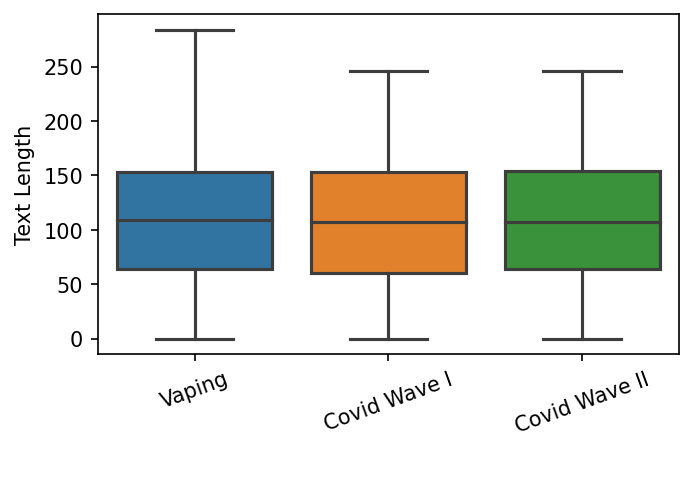

In [103]:
#Boxplot in text length by issues

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

usaonly = df[df['usar']==1]
plt.figure(figsize=(5, 3), dpi=150)
ax=sns.boxplot(data=usaonly, y="text_len", x="nevent") 

ax.set_xlabel(" ")
ax.set_ylabel("Text Length")
ax.set_xticklabels( ['Vaping', 'Covid Wave I', 'Covid Wave II'],
       rotation=20) 


plt.show()

##Mean and STD of text length

In [104]:
# Mean and std in gtext length

print(usaonly.groupby('nevent')['text_len'].mean())
print(usaonly.groupby('nevent')['text_len'].std())

nevent
0.0    111.222575
1.0    106.762247
2.0    107.048765
Name: text_len, dtype: float64
nevent
0.0    59.709573
1.0    54.489127
2.0    54.260045
Name: text_len, dtype: float64


# Word Cloud

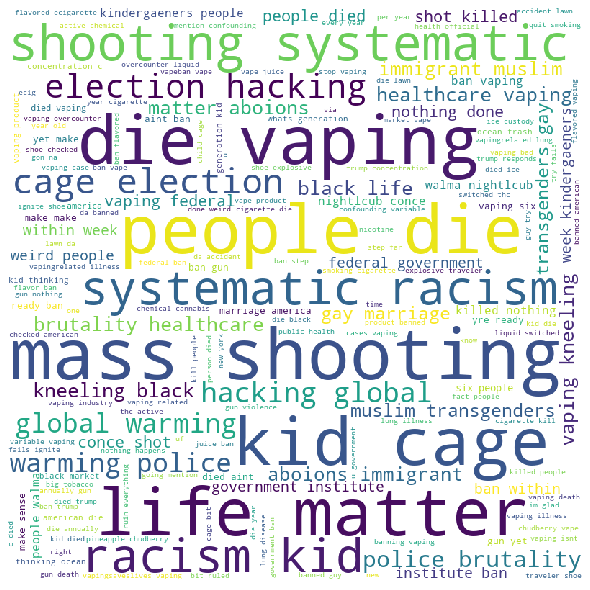

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

comment_words0 = ''


for val in df[(df.nevent==0) & (df.usar==1)].cleantext:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words0 += " ".join(tokens)+" "
 
wordcloud0 = WordCloud(width = 800, height = 800,
                background_color ='white',
                max_words=200,
                min_font_size = 10).generate(comment_words0)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud0, interpolation="nearest") #, interpolation="nearest",
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [13]:
comment_words0

' vaping ecigarettes big tobacco strategy circumvent public policy keep marketing product teen jocoyls epidemic mean effecting trending affect dispropoionately large umber individual within population community region time increase high school vaping middle school jocoyls yearold athlete lung totally failed doctor think vaping might behind cdc say investigating similar case severe lung disease across country could caused vaping repos increasing number people hospitalized severe respiratory problem appear caused vaping case stumped doctor publichealth official ftc investigating wher juul used deceptive marketing targeted minor according wall street journal repo company criticized fueling teen vaping epidemic enough enough stop vaping stay healthy vaping safe many patient think safe alternative smoking people vaping thc cdc staying quiet vapingrelated lung illness spike investigator eye contaminant governor holcomb vaping epidemic unbelievable misinformation repoing oan vaping find fact 

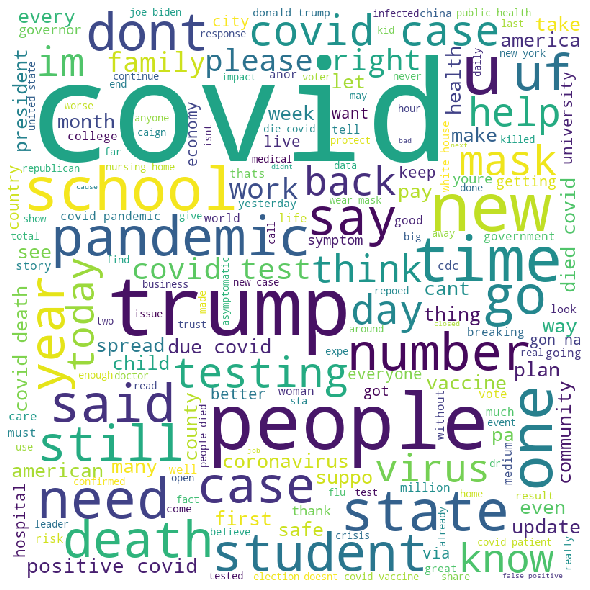

In [106]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

comment_words1 = ''


for val in df[(df.nevent==1) & (df.usar==1)].cleantext:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words1 += " ".join(tokens)+" "
 
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                max_words=200,
                min_font_size = 10).generate(comment_words1)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud1, interpolation="nearest" )  #interpolation="nearest",
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

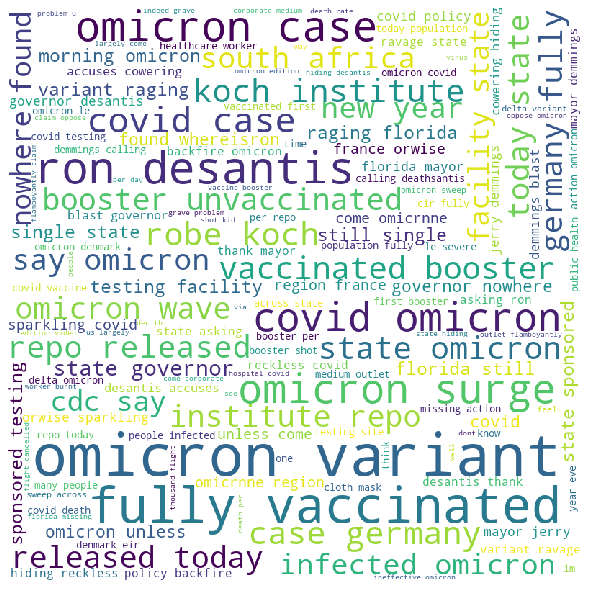

In [107]:
comment_words2 = ''


for val in df[(df.nevent==2) & (df.usar==1)].cleantext:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words2 += " ".join(tokens)+" "
 
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='white',
                max_words=200,
                min_font_size = 10).generate(comment_words2)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud2, interpolation="nearest")
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# calculate frequency of words

In [108]:

text0 = df[(df.nevent==0) & (df.usar==1)].cleantext.str.split(expand=True).stack().value_counts()
text0.head(15)


vaping        10566
people         4367
ban            3595
kid            2185
die            1985
like           1826
died           1604
gun            1530
make           1520
black          1495
cage           1437
mass           1430
shooting       1418
life           1408
government     1403
dtype: int64

In [109]:
text1 = df[(df.nevent==1) & (df.usar==1)].cleantext.str.split(expand=True).stack().value_counts()
text1.head(15)

covid       1240
trump        194
people       192
new          129
case         126
u            116
get          110
death         95
dont          95
test          90
state         88
time          84
pandemic      84
positive      84
cdc           83
dtype: int64

In [111]:
text2 = df[(df.nevent==2) & (df.usar==1)].cleantext.str.split(expand=True).stack().value_counts()
text2.head(15)

omicron       9809
covid         5234
case          1943
variant       1858
state         1778
people        1766
vaccinated    1481
florida       1300
get           1290
new           1271
desantis      1239
booster       1162
vaccine       1133
mild          1063
like          1001
dtype: int64

In [175]:
text0.to_csv('text0.csv')

# Bigram and frequency

In [127]:
from nltk import FreqDist
from nltk.util import ngrams    



tokens = nltk.word_tokenize(comment_words0)

#Create your bigrams
bgs = nltk.bigrams(tokens)

#compute frequency distribution for all the bigrams in the text
fdist0 = nltk.FreqDist(bgs)

fd0=pd.DataFrame.from_dict(fdist0,  orient='index')
fd0.reset_index(inplace=True)
fd0.columns=['bigram', 'freq']
fd0=fd0.sort_values(by=['freq'], ascending=False)

fd0.head(15)


,bigram,freq
9066,"(mass, shooting)",1392
1698,"(people, die)",1238
1679,"(die, vaping)",1238
10535,"(kid, cage)",1174
18989,"(life, matter)",1173
18974,"(like, mass)",1173
18981,"(global, warming)",1172
18991,"(aboions, immigrant)",1172
18980,"(hacking, global)",1172
18990,"(matter, aboions)",1172


In [129]:
from nltk import FreqDist
from nltk.util import ngrams    



tokens = nltk.word_tokenize(comment_words1)

#Create your bigrams
bgs = nltk.bigrams(tokens)

#compute frequency distribution for all the bigrams in the text
fdist1 = nltk.FreqDist(bgs)

fd1=pd.DataFrame.from_dict(fdist1,  orient='index')
fd1.reset_index(inplace=True)
fd1.columns=['bigram', 'freq']
fd1=fd1.sort_values(by=['freq'], ascending=False)

fd1.head(15)




,bigram,freq
319,"(covid, case)",47
81,"(positive, covid)",37
2326,"(covid, test)",36
438,"(due, covid)",32
2612,"(covid, death)",29
16,"(died, covid)",29
509,"(gon, na)",25
537,"(covid, pandemic)",24
497,"(donald, trump)",21
1227,"(covid, patient)",20


In [130]:
from nltk import FreqDist
from nltk.util import ngrams    



tokens = nltk.word_tokenize(comment_words2)

#Create your bigrams
bgs = nltk.bigrams(tokens)

#compute frequency distribution for all the bigrams in the text
fdist2 = nltk.FreqDist(bgs)

fd2=pd.DataFrame.from_dict(fdist2,  orient='index')
fd2.reset_index(inplace=True)
fd2.columns=['bigram', 'freq']
fd2=fd2.sort_values(by=['freq'], ascending=False)
fd2.head(15)


,bigram,freq
2127,"(omicron, variant)",1163
1127,"(fully, vaccinated)",819
14268,"(ron, desantis)",641
7587,"(omicron, case)",551
187,"(covid, omicron)",492
659,"(omicron, surge)",446
218,"(covid, case)",376
42286,"(robe, koch)",330
42287,"(koch, institute)",329
42290,"(case, germany)",324
